# Tugas Analisis Multimedia: **Image (Citra Digital)**

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Muhammad Fadil Ataullah Rifqi
**NIM:** 122140205

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami **representasi dasar data citra digital (image)** melalui praktik langsung memuat data, visualisasi komponen warna, serta melakukan analisis spasial sederhana menggunakan berbagai teknik dasar pengolahan citra.

Anda akan bekerja dengan satu atau beberapa gambar (foto diri, objek, atau lingkungan sekitar) untuk:

- Mengamati struktur data piksel dan channel warna (RGB, Grayscale, HSV, dsb.)
- Menganalisis perbedaan hasil visualisasi antar representasi warna
- Melakukan eksplorasi sederhana terhadap transformasi citra (cropping, filtering, edge detection, dll.)
- Menyimpulkan pengaruh setiap tahap pemrosesan terhadap persepsi visual

Fokus tugas ini adalah pada **pemahaman konsep representasi spasial citra digital** dan **interpretasi hasil visualisasi**, **bukan** pada manipulasi kompleks atau penerapan model pembelajaran mesin.


### **Soal 1 — Cropping dan Konversi Warna**

- Ambil sebuah gambar diri Anda (_selfie_) menggunakan kamera atau smartphone.
- Lakukan **cropping secara manual** untuk menghasilkan dua potongan:

  - Cropping **kotak persegi pada area wajah**.
  - Cropping **persegi panjang pada area latar belakang**.

- Resize hasil crop menjadi **920×920 piksel**.
- Konversi gambar menjadi **grayscale** dan **HSV**, lalu tampilkan ketiganya berdampingan.
- Tambahkan **anotasi teks** berisi nama Anda di atas kepala pada gambar hasil crop.

  - Gaya teks (font, warna, posisi, ukuran, ketebalan) **dibebaskan**.

- Jelaskan efek **cropping** dan **perubahan warna** menggunakan **Markdown**.


Ukuran Foto: 2448x3264


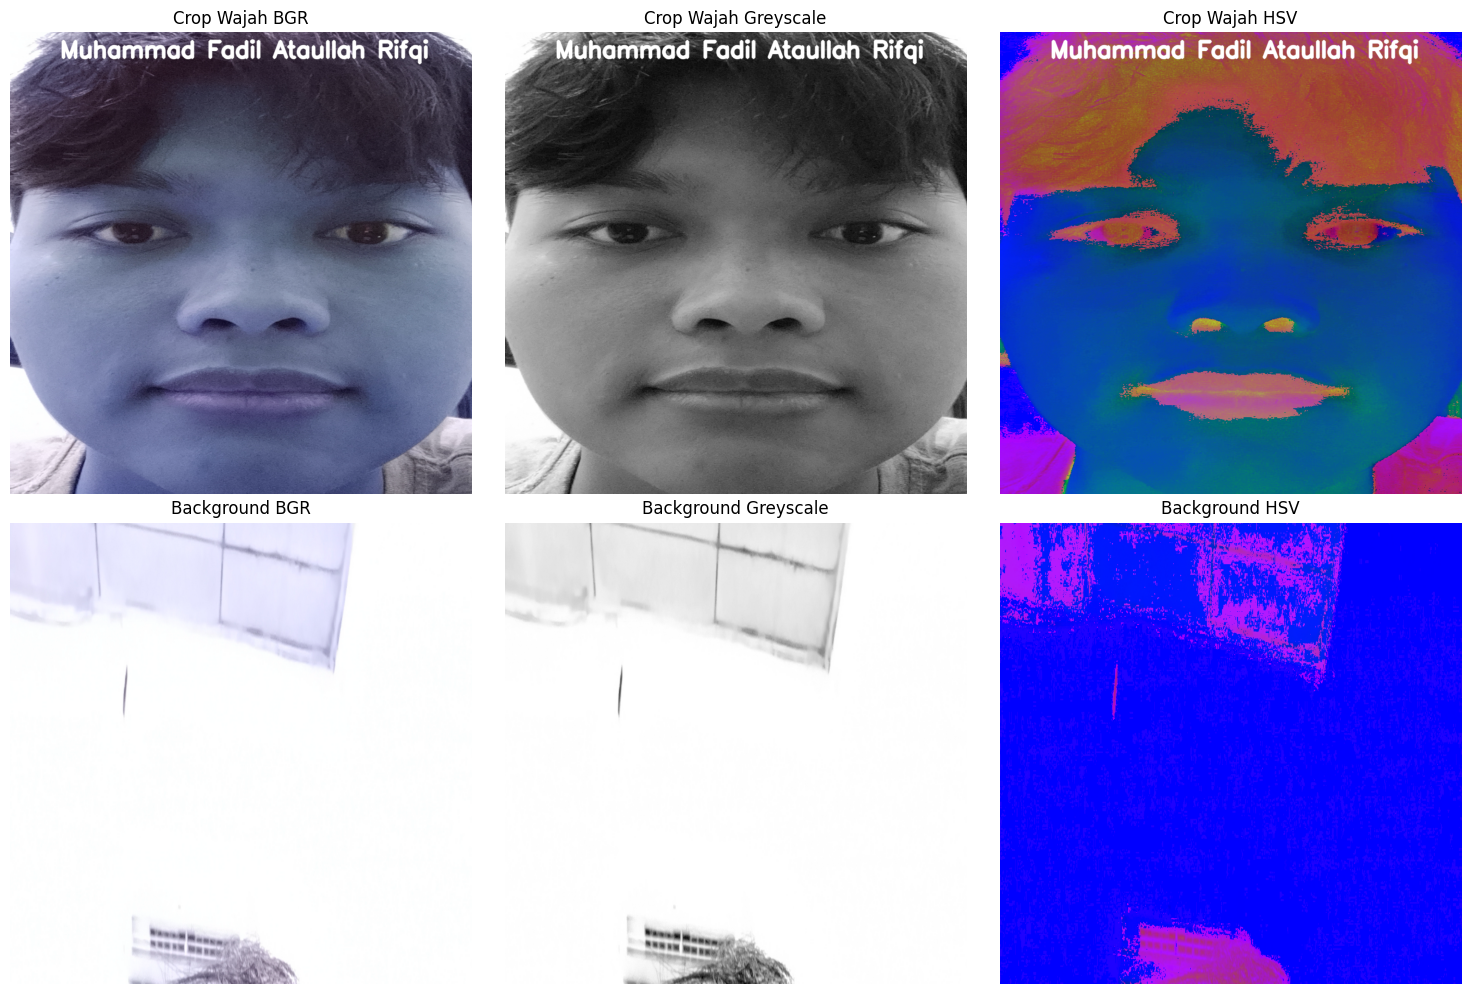

In [106]:
import os
import cv2
import matplotlib.pyplot as plt

# path file foto selfie
selfie_path = os.path.join(os.getcwd(), 'assets_ws4','selfie.jpg')

full_photo = cv2.imread(selfie_path)

# ukuran full photo
height, width, _ = full_photo.shape
print(f'Ukuran Foto: {width}x{height}')

# setelah mencoba didapatkan area wajah yaitu dari y 1200 sampai 2700 dan x dari 600 sampai 1800
face_only = full_photo[800:2600, 600:1800]
# setelah mencoba didapatkan area latar belakang di atas wajah yaitu dari y 0 sampai 700 dan x dari 0 sampai 2448
background_only = full_photo[0:700, 0:2448]

# resize ke 920x920 untuk hasil crop
face_only_resized = cv2.resize(face_only, (920, 920))
background_only_resized = cv2.resize(background_only, (920, 920))

# ubah ke format greyscale, hsv, dan rgb
face_only_resized_greyscale = cv2.cvtColor(face_only_resized, cv2.COLOR_BGR2GRAY)
face_only_resized_hsv = cv2.cvtColor(face_only_resized, cv2.COLOR_BGR2HSV)
background_only_resized_greyscale = cv2.cvtColor(background_only_resized, cv2.COLOR_BGR2GRAY)
background_only_resized_hsv = cv2.cvtColor(background_only_resized, cv2.COLOR_BGR2HSV)

# tambahkan anotasi nama di atas kepala
cv2.putText(face_only_resized, "Muhammad Fadil Ataullah Rifqi", (100,50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), 5, cv2.LINE_AA)
cv2.putText(face_only_resized_greyscale, "Muhammad Fadil Ataullah Rifqi", (100,50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), 5, cv2.LINE_AA)
cv2.putText(face_only_resized_hsv, "Muhammad Fadil Ataullah Rifqi", (100,50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), 5, cv2.LINE_AA)


# tampilkan berdampingan
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(face_only_resized)
axs[0, 0].set_title('Crop Wajah BGR')
axs[0, 1].imshow(face_only_resized_greyscale, cmap='gray')
axs[0, 1].set_title('Crop Wajah Greyscale')
axs[0, 2].imshow(face_only_resized_hsv, cmap='hsv')
axs[0, 2].set_title('Crop Wajah HSV')
axs[1, 0].imshow(background_only_resized)
axs[1, 0].set_title('Background BGR')
axs[1, 1].imshow(background_only_resized_greyscale, cmap='gray')
axs[1, 1].set_title('Background Greyscale')
axs[1, 2].imshow(background_only_resized_hsv, cmap='hsv')
axs[1, 2].set_title('Background HSV')
for ax in axs.flat:
    ax.axis('off')
plt.tight_layout()
plt.show()


### **Penjelasan Crop dan Perubahan Warna**

Pertama saya harus tahu dulu ukuran foto untuk mempermudah memperkirakan dimana koordinat atas hingga bawah dan kiri hingga kanan wajah saya. Setelah dicoba didapatkan koordinat yang pas yaitu koordinat atas 800 dan bawah 2600 pada sumbu y, koordinat kiri 600 dan kanan 1800 untuk sumbu x dan untuk latar belakang saya ambil area di atas kepala saya yaitu koordinat atas 0 dan bawah 700 untuk sumbu y, koordinat kiri 0 dan koordinat kanan 2448 untuk sumbu x atau ukuran penuh lebar foto. Kemudian saya resize 2 foto yang sudah di crop terrsebut menjadi ukuran 920x920 menggunakan fungsi resize(). Setelah di resize saya mengubah format warna dari kedua foto tersebut menggunakan fungsi bawaan cv2 cvtColor konversi dari default bgr ke gray dan hsv.


### **Soal 2 — Manipulasi Channel Warna RGB**

- Gunakan gambar hasil crop dari Soal 1.
- Konversikan gambar ke ruang warna **RGB**.
- Lakukan manipulasi channel warna dengan cara:

  - **Naikkan intensitas channel merah sebanyak 50 poin** (maksimum 255).
  - **Turunkan intensitas channel biru sebanyak 30 poin** (minimum 0).

- Teknik atau cara menaikkan/menurunkan intensitas **dibebaskan**, asalkan logis dan hasilnya terlihat.
- Gabungkan kembali channel warna dan **simpan gambar hasil modifikasi dalam format `.png`**.
- **Tampilkan histogram per channel (R, G, B)** untuk gambar asli dan hasil modifikasi menggunakan `matplotlib.pyplot.hist`.
- Jelaskan dampak perubahan RGB pada warna gambar dalam sel **Markdown**.


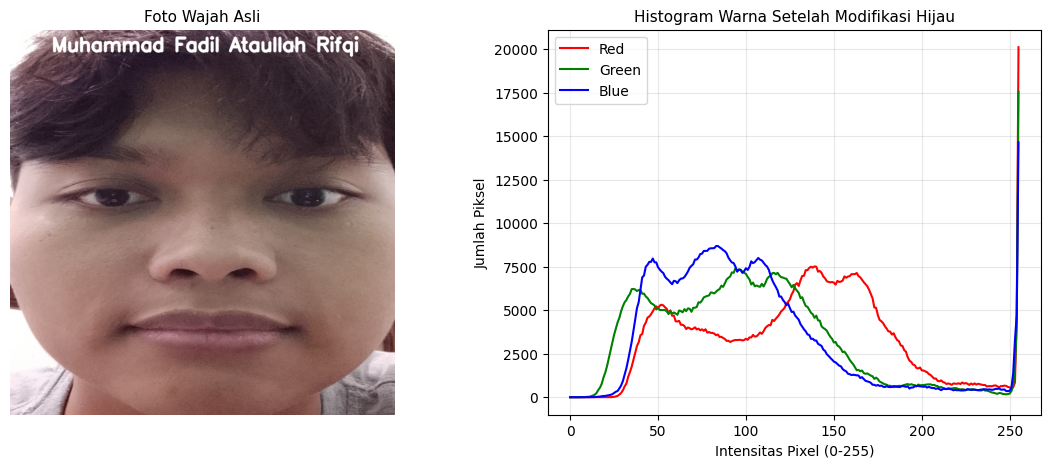

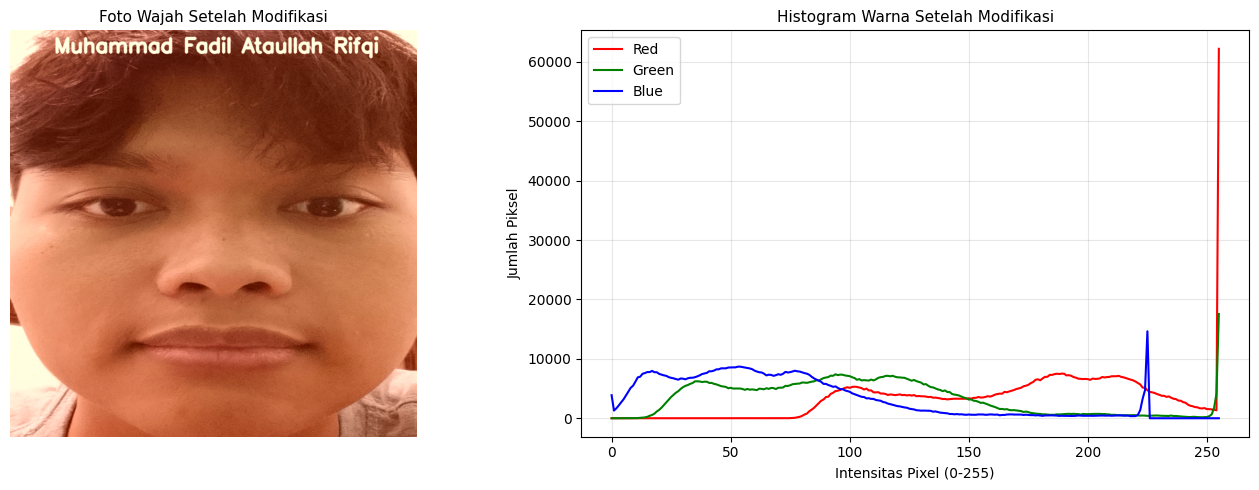

In [107]:
import numpy as np

face_only_resized_rgb = cv2.cvtColor(face_only_resized, cv2.COLOR_BGR2RGB)
background_only_resized_rgb = cv2.cvtColor(background_only_resized, cv2.COLOR_BGR2RGB)

modified_face_only_resized_rgb = face_only_resized_rgb.copy()

red = face_only_resized_rgb[:, :, 0].astype(np.int16)
blue = face_only_resized_rgb[:, :, 2].astype(np.int16)

red = np.clip(red + 50, 0, 255)
blue = np.clip(blue - 30, 0, 255)

modified_face_only_resized_rgb[:, :, 0] = red.astype(np.uint8)
modified_face_only_resized_rgb[:, :, 2] = blue.astype(np.uint8)

output_path = os.path.join(os.getcwd(), 'results_ws4' , 'modified_face_only_resized_rgb.png')
cv2.imwrite(output_path, cv2.cvtColor(modified_face_only_resized_rgb, cv2.COLOR_RGB2BGR))

colors = ('r','g','b')
labels = ('Red','Green','Blue')

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].imshow(face_only_resized_rgb)
axs[0].set_title("Foto Wajah Asli", fontsize=11)
axs[0].axis('off')

for i, (col, label) in enumerate(zip(colors, labels)):
    hist = cv2.calcHist([face_only_resized_rgb], [i], None, [256], [0,256])
    axs[1].plot(hist, color=col, label=label)

axs[1].set_title("Histogram Warna Setelah Modifikasi Hijau", fontsize=11)
axs[1].set_xlabel("Intensitas Pixel (0-255)")
axs[1].set_ylabel("Jumlah Piksel")
axs[1].legend()
axs[1].grid(True, alpha=0.3)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].imshow(modified_face_only_resized_rgb)
axs[0].set_title("Foto Wajah Setelah Modifikasi", fontsize=11)
axs[0].axis('off')

for i, (col, label) in enumerate(zip(colors, labels)):
    hist = cv2.calcHist([modified_face_only_resized_rgb], [i], None, [256], [0,256])
    axs[1].plot(hist, color=col, label=label)
axs[1].set_title("Histogram Warna Setelah Modifikasi", fontsize=11)
axs[1].set_xlabel("Intensitas Pixel (0-255)")
axs[1].set_ylabel("Jumlah Piksel")
axs[1].legend()
axs[1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

### **Dampak perubahan RGB pada warna**

Untuk dampak visual terlihat foto cenderung berwarna merah karena nilai merah pada rgb ditambah 50, untuk persebaran histogram warna warna merah dengan intensitas pixel 255 naik dari sekitar 20000 menjadi sekitar 60000 dan warna biru dengan intensitas pixel o naik dari sekitar 0 menjadi sekitar 400. warna biru yang tadinya nilai maks intensitas warnanya di 255 sekarang ada di 225


### **Soal 3 — Deteksi Tepi dan Filter Citra**

- Ambil gambar **objek dengan background bertekstur** (misalnya kain bermotif, jerami, atau batu).
- Terapkan **edge detection (Canny)** dan tampilkan hasilnya.
- Lakukan **thresholding dengan nilai ambang tertentu** (bebas Anda tentukan) agar hanya objek utama yang tersisa.
- Buat **bounding box** di sekitar objek hasil segmentasi (boleh manual atau otomatis).
- Terapkan **filter blur** dan **filter sharpening**, lalu **bandingkan hasil keduanya**.
- Jelaskan bagaimana setiap filter memengaruhi detail gambar dalam format **Markdown**.


Total kontur terdeteksi: 40
Kontur setelah filter area: 8


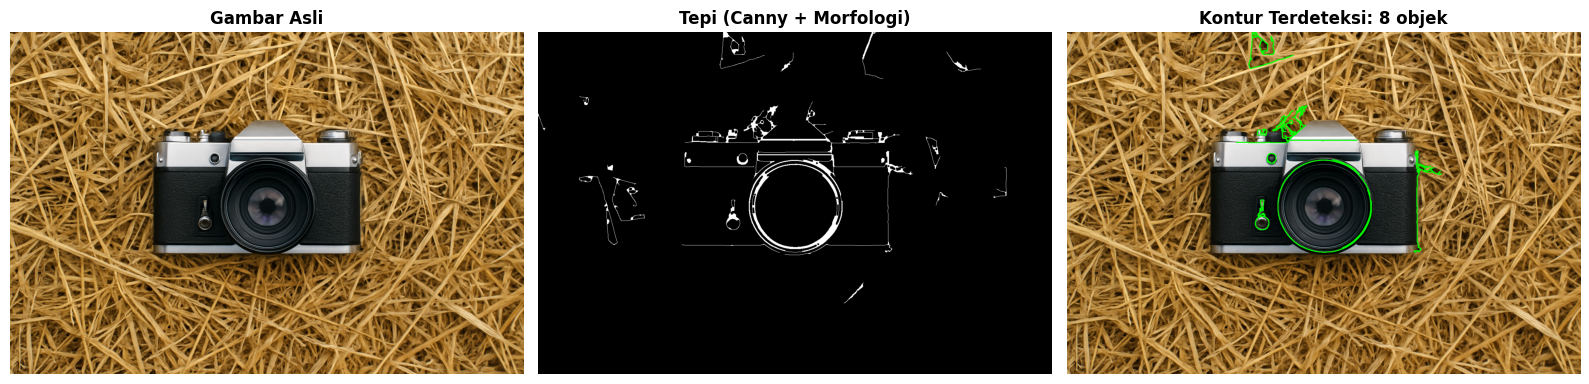

Total kontur terdeteksi: 932
Kontur setelah filter area: 50


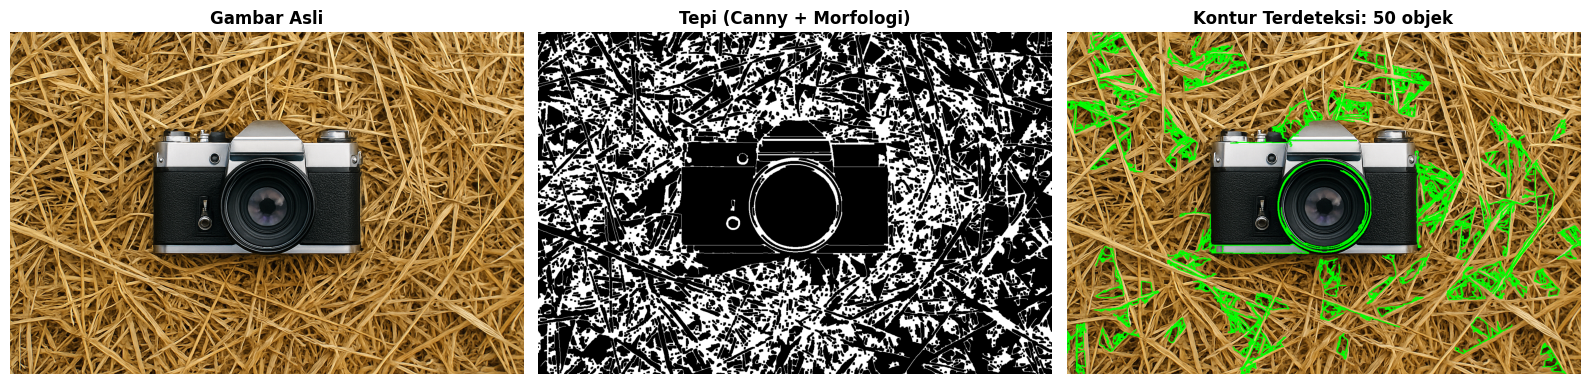

Total kontur terdeteksi: 515
Kontur setelah filter area: 201


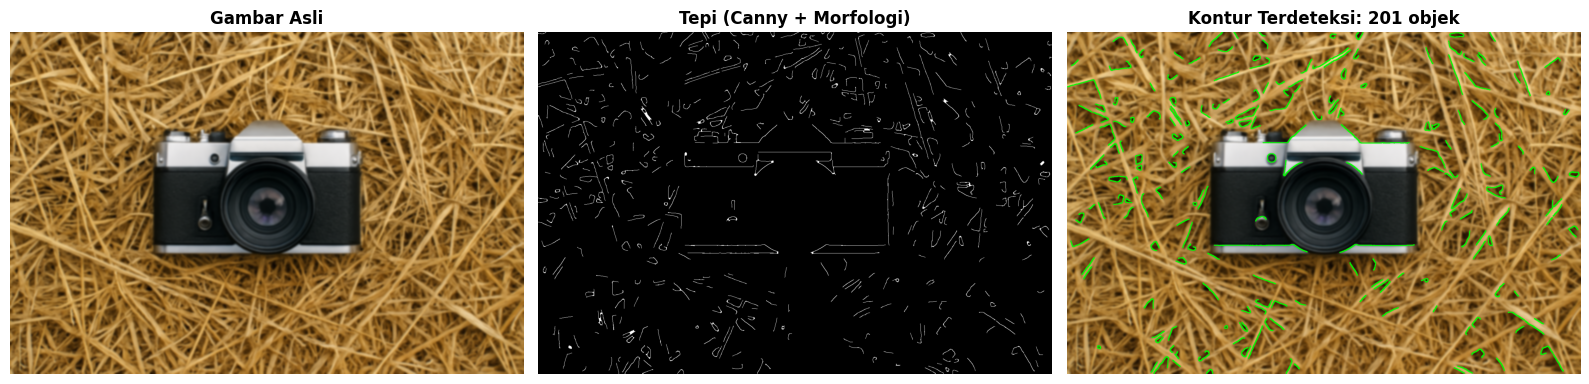

<Figure size 640x480 with 0 Axes>

In [108]:
import dlib

object_path = os.path.join(os.getcwd(), 'assets_ws4' , 'objek.png')
img = cv2.imread(object_path)


# Deteksi tepi menggunakan Canny
edges = cv2.Canny(img, 700, 50, apertureSize=3, L2gradient=True)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
edges_closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)


contours_img, hierarchy_img = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(f"Total kontur terdeteksi: {len(contours_img)}")

# Filter kontur berdasarkan area
min_area = 200
max_area = img.shape[0] * img.shape[1] * 0.8

filtered_contours = []
for c in contours_img:
    area = cv2.contourArea(c)
    if min_area < area < max_area:
        filtered_contours.append(c)

print(f"Kontur setelah filter area: {len(filtered_contours)}")

# Urutkan berdasarkan area (terbesar dulu)
filtered_contours = sorted(filtered_contours, key=cv2.contourArea, reverse=True)

img_contours = img.copy()
cv2.drawContours(img_contours, filtered_contours, -1, (0, 255, 0), 2)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Gambar Asli", fontsize=12, fontweight='bold')
axes[0].axis("off")

axes[1].imshow(edges_closed, cmap='gray')
axes[1].set_title("Tepi (Canny + Morfologi)", fontsize=12, fontweight='bold')
axes[1].axis("off")

axes[2].imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
axes[2].set_title(f"Kontur Terdeteksi: {len(filtered_contours)} objek", fontsize=12, fontweight='bold')
axes[2].axis("off")

plt.tight_layout()
plt.show()

# Gaussian Blur (reduksi noise)
blur = cv2.GaussianBlur(img, (15, 15), 0)
blur_rgb = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)

# Sharpening (penajaman)
kernel_sharp = np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]])
sharp = cv2.filter2D(img, -1, kernel_sharp)
sharp_rgb = cv2.cvtColor(sharp, cv2.COLOR_BGR2RGB)

edges_blur = cv2.Canny(blur, 90, 150, apertureSize=3, L2gradient=True)
edges_sharp = cv2.Canny(sharp, 700, 50, apertureSize=3, L2gradient=True)

sharp_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
sharp_edges_closed = cv2.morphologyEx(edges_sharp, cv2.MORPH_CLOSE, sharp_kernel, iterations=2)

sharp_contours_img, sharp_hierarchy_img = cv2.findContours(edges_sharp, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(f"Total kontur terdeteksi: {len(sharp_contours_img)}")

# Filter kontur berdasarkan area
min_area = 600
max_area = img.shape[0] * img.shape[1] * 0.8

sharp_filtered_contours = []
for c in sharp_contours_img:
    area = cv2.contourArea(c)
    if min_area < area < max_area:
        sharp_filtered_contours.append(c)

print(f"Kontur setelah filter area: {len(sharp_filtered_contours)}")

# Urutkan berdasarkan area (terbesar dulu)
sharp_filtered_contours = sorted(sharp_filtered_contours, key=cv2.contourArea, reverse=True)

sharp_contours = sharp.copy()
cv2.drawContours(sharp_contours, sharp_filtered_contours, -1, (0, 255, 0), 2)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].imshow(cv2.cvtColor(sharp, cv2.COLOR_BGR2RGB))
axes[0].set_title("Gambar Asli", fontsize=12, fontweight='bold')
axes[0].axis("off")

axes[1].imshow(sharp_edges_closed, cmap='gray')
axes[1].set_title("Tepi (Canny + Morfologi)", fontsize=12, fontweight='bold')
axes[1].axis("off")

axes[2].imshow(cv2.cvtColor(sharp_contours, cv2.COLOR_BGR2RGB))
axes[2].set_title(f"Kontur Terdeteksi: {len(sharp_filtered_contours)} objek", fontsize=12, fontweight='bold')
axes[2].axis("off")

plt.tight_layout()
plt.show()


blur_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
blur_edges_closed = cv2.morphologyEx(edges_blur, cv2.MORPH_CLOSE, blur_kernel, iterations=2)

blur_contours_img, blur_hierarchy_img = cv2.findContours(edges_blur, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(f"Total kontur terdeteksi: {len(blur_contours_img)}")

# Filter kontur berdasarkan area
min_area = 10
max_area = img.shape[0] * img.shape[1] * 0.8

blur_filtered_contours = []
for c in blur_contours_img:
    area = cv2.contourArea(c)
    if min_area < area < max_area:
        blur_filtered_contours.append(c)

print(f"Kontur setelah filter area: {len(blur_filtered_contours)}")

# Urutkan berdasarkan area (terbesar dulu)
blur_filtered_contours = sorted(blur_filtered_contours, key=cv2.contourArea, reverse=True)

blur_img_contours = blur.copy()
cv2.drawContours(blur_img_contours, blur_filtered_contours, -1, (0, 255, 0), 2)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
axes[0].set_title("Gambar Asli", fontsize=12, fontweight='bold')
axes[0].axis("off")

axes[1].imshow(blur_edges_closed, cmap='gray')
axes[1].set_title("Tepi (Canny + Morfologi)", fontsize=12, fontweight='bold')
axes[1].axis("off")

axes[2].imshow(cv2.cvtColor(blur_img_contours, cv2.COLOR_BGR2RGB))
axes[2].set_title(f"Kontur Terdeteksi: {len(blur_filtered_contours)} objek", fontsize=12, fontweight='bold')
axes[2].axis("off")

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


### **Soal 4 — Deteksi Wajah dan Filter Digital Kreatif**

- Ambil gambar diri Anda dengan ekspresi wajah **netral**.
- Lakukan **deteksi wajah dan landmark** menggunakan salah satu dari:

  - **MediaPipe**, atau
  - **Dlib**, atau
  - **OpenCV**.

- Buat **overlay filter digital kreatif** karya Anda sendiri, misalnya:

  - topi, kumis, masker, helm, aksesoris, atau bentuk unik lainnya.
  - Filter boleh dibuat dari **gambar eksternal (PNG)** _atau_ digambar langsung (misal bentuk lingkaran, garis, poligon, dll).

- Pastikan posisi overlay menyesuaikan **landmark wajah** dengan logis.
- **Gunakan alpha blending sebagai saran** agar hasil tampak lebih natural.
- Tampilkan perbandingan antara **gambar asli** dan **hasil dengan filter**.
- Jelaskan bagaimana Anda menghitung posisi overlay dan tantangan yang dihadapi selama implementasi (gunakan **Markdown**).


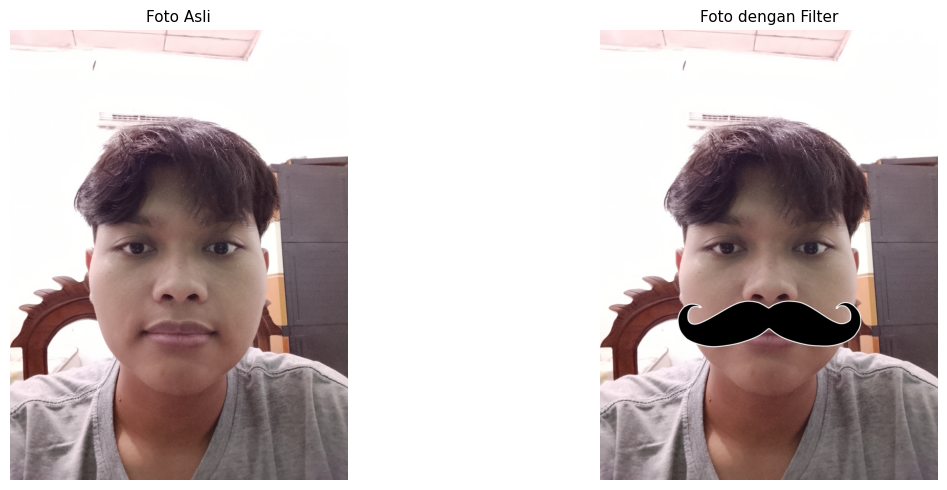

In [109]:

predictor_path = os.path.join(os.getcwd(), "assets_ws4", "shape_predictor_68_face_landmarks.dat")
face_path = os.path.join(os.getcwd(), "assets_ws4", "selfie.jpg")
mustache_path = os.path.join(os.getcwd(), "assets_ws4", "mustache.png")

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

img = cv2.imread(face_path)
face_rgb = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(face_rgb, cv2.COLOR_RGB2GRAY)

faces = detector(gray)

if len(faces) == 0:
    print("No face detected!")
else:
    for face in faces:
        shape = predictor(gray, face)
        landmarks = np.array([[shape.part(i).x, shape.part(i).y] for i in range(68)])

        # landmark 33 di ujung tengah hidung
        x33, y33 = landmarks[33]

        mustache = cv2.imread(mustache_path, cv2.IMREAD_UNCHANGED)

        mustache_width = int((face.right() - face.left()) )
        aspect_ratio = mustache.shape[0] / mustache.shape[1]
        mustache_height = int(mustache_width * aspect_ratio)

        mustache_resized = cv2.resize(mustache, (mustache_width, mustache_height))

        # posisi mustache
        x1 = x33 - mustache_width // 2
        x2 = x33 + mustache_width // 2
        y1 = y33 - 200
        y2 = y1 + mustache_height

        # alpha blending
        mustache_rgba = mustache_resized[:, :, :4]
        b, g, r, a = cv2.split(mustache_rgba)

        alpha = a.astype(float) / 255.0
        alpha = cv2.merge([alpha, alpha, alpha])

        area_mustache = face_rgb[y1:y2, x1:x2]

        must_rgb = cv2.merge([r, g, b])
        blended = (alpha * must_rgb + (1 - alpha) * area_mustache).astype(np.uint8)

        face_rgb[y1:y2, x1:x2] = blended

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Foto Asli", fontsize=11)
    axs[0].axis('off')
    axs[1].imshow(face_rgb)
    axs[1].set_title("Foto dengan Filter", fontsize=11)
    axs[1].axis('off')
    plt.tight_layout()
    plt.show()


### **Menghitung Posisi Mustache**

Untuk mencari posisi yang tepat kumis saya pertama mencari titik tengah yang akan di tempelkan kumis yaitu landmark 33 titik tengah hidung kemudian saya resize kumis menjadi lebar muka saya menggunakan face.right() - face.left() dengan mempertahankan aspek rasio tingginya, setelah itu saya ujung kiri mustache di x nya landmark 33 tadi dikurang lebar mustache / 2 dan ujung kanan mustache di x nya landmark 33 + lebar mustache / 2 untuk menempatkan mustcache di tengah x landmark 33 kemudian saya menyesuaikan ujung atas mustache di y nya landmark 33 dan menyesuaikan sedikit sebanyak 200 pixel ke bawah


### **Soal 5 — Perspektif dan Peningkatan Kualitas Citra**

- Ambil gambar **objek datar** seperti karya tangan di kertas, tulisan di papan tulis, atau foto produk di meja dengan kondisi pencahayaan atau sudut yang tidak ideal.
- Lakukan **preprocessing** untuk memperbaiki tampilan agar lebih rapi dan jelas, dengan langkah-langkah:

  - Konversi ke **grayscale**.
  - **Koreksi perspektif (transformasi homografi)** menggunakan **4 titik manual** agar objek terlihat sejajar dan tidak terdistorsi.
  - Terapkan **thresholding adaptif atau Otsu** (pilih salah satu, dan jelaskan alasan pilihan Anda).

- Tampilkan **setiap tahap pemrosesan dalam satu grid** agar mudah dibandingkan.
- Jelaskan fungsi masing-masing tahap dan bagaimana teknik ini meningkatkan kualitas visual citra (gunakan **Markdown**).


Ukuran dokumen: 2448x3264


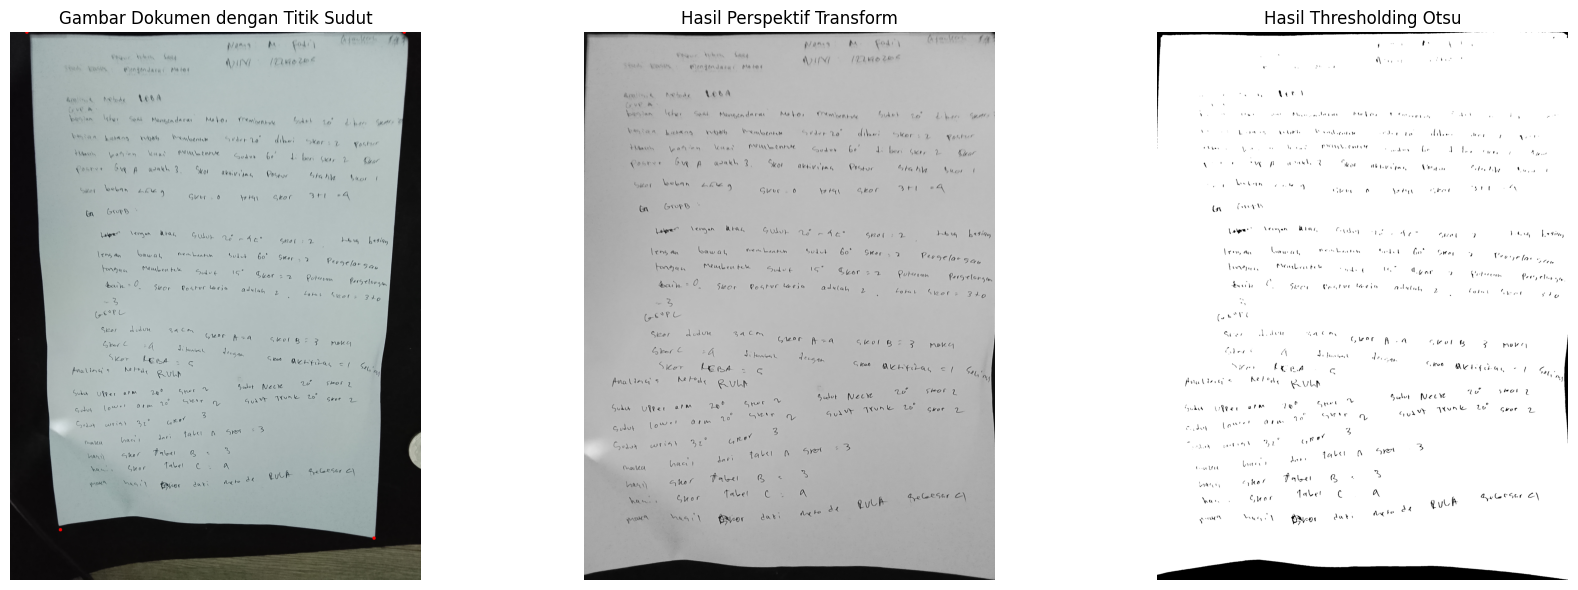

In [ ]:
dokumen_path = os.path.join(os.getcwd(), 'assets_ws4', 'dokumen.jpg')

dokumen_img = cv2.imread(dokumen_path)
print(f'Ukuran dokumen: {dokumen_img.shape[1]}x{dokumen_img.shape[0]}')

dokumen_grayscale = cv2.cvtColor(dokumen_img, cv2.COLOR_BGR2GRAY)
kiri_atas = (100,0)
kanan_atas = (dokumen_grayscale.shape[1]-100,0)
kiri_bawah = (300,dokumen_grayscale.shape[0] -300)
kanan_bawah = (dokumen_grayscale.shape[1]-280,dokumen_grayscale.shape[0] - 250)

red = (0, 0, 255)

cv2.circle(dokumen_img, kiri_atas, 10, red, -1)
cv2.circle(dokumen_img, kanan_atas, 10, red, -1)
cv2.circle(dokumen_img, kiri_bawah, 10, red, -1)
cv2.circle(dokumen_img, kanan_bawah, 10, red, -1)

pts_lama = np.float32([
    kiri_atas,
    kanan_atas,
    kiri_bawah,
    kanan_bawah
])

pts_baru = np.float32([
    [0, 0],
    [dokumen_grayscale.shape[1], 0],
    [0, dokumen_grayscale.shape[0]],
    [dokumen_grayscale.shape[1], dokumen_grayscale.shape[0]]
])

M = cv2.getPerspectiveTransform(pts_lama, pts_baru)
hasil = cv2.warpPerspective(dokumen_grayscale, M, (dokumen_grayscale.shape[1], dokumen_grayscale.shape[0]))

_, thresh = cv2.threshold(hasil, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(cv2.cvtColor(dokumen_img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Gambar Dokumen dengan Titik Sudut', fontsize=12)
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(hasil, cv2.COLOR_BGR2RGB))
axs[1].set_title('Hasil Perspektif Transform', fontsize=12)
axs[1].axis('off')
axs[2].imshow(thresh, cmap='gray')
axs[2].set_title('Hasil Thresholding Otsu', fontsize=12)
axs[2].axis('off')
plt.tight_layout()
plt.show()


### **Fungsi Tahap**

- Ubah ke grayscale agar menghilangkan warna warna yang tidak penting agar teks lebih terlihat
- koreksi Perspektif agar isi dari gambar fokus ke objek yang ingin kita lihat seperti gambar saya adalah sebuah dookumen
- Menerapkan treshold untuk menyesuaikan pencahayaan


### **Aturan Umum Pengerjaan**

- Kerjakan secara **mandiri**.
- Bantuan AI (seperti ChatGPT, Copilot, dsb.) diperbolehkan **dengan bukti percakapan** (screenshot / link / script percakapan).
- Source code antar mahasiswa harus berbeda.
- Jika mendapat bantuan teman, tuliskan nama dan NIM teman yang membantu.
- Plagiarisme akan dikenakan sanksi sesuai aturan akademik ITERA.
- Cantumkan seluruh **credit dan referensi** yang digunakan di bagian akhir notebook.
- Penjelasan setiap soal ditulis dalam **Markdown**, bukan di dalam komentar kode.

---

### **Aturan Pengumpulan**

- Semua file kerja Anda (notebook `.ipynb`, gambar, dan hasil) **wajib diunggah ke GitHub repository tugas sebelumnya**.

  - Gunakan struktur folder berikut di dalam repo Anda:

    ```
    /Nama_NIM_Repo/ # Nama repo sebelumnya
      ├── assets_ws4/     # berisi semua gambar atau video asli (input)
      ├── results_ws4/    # berisi semua hasil modifikasi dan output
      ├── worksheet4.ipynb
      └── NIM_Worksheet4.pdf
    ```

- File yang dikumpulkan ke **Tally** hanya berupa **hasil PDF** dari notebook Anda, dengan format nama:

  ```
  NIM_Worksheet4.pdf
  ```

- Pastikan notebook telah dijalankan penuh sebelum diekspor ke PDF.
- Sertakan tautan ke repository GitHub Anda di bagian atas notebook atau di halaman pertama PDF.

---

### ✅ **Catatan Akhir**

> Worksheet 4 ini bertujuan mengasah pemahaman Anda tentang manipulasi citra digital secara praktis. Gunakan kreativitas Anda untuk menghasilkan hasil visual yang menarik dan penjelasan konseptual yang jelas.
